In [2]:
import sys
sys.path.append("..")
import xarray as xr
import numpy as np
from LESutils import load_stats, load_full
from matplotlib import pyplot as plt

# Determine windows for fitting
## Load RFM.nc, var4.nc, stats file

In [5]:
dnc = "/home/bgreene/simulations/u15_tw10_qw04_dry3/output/netcdf/"
s = load_stats(dnc+"mean_stats_xyt_5-6h_rot.nc", SBL=False)
RFM_var = xr.load_dataset(dnc+"RFM.nc")
var4 = xr.load_dataset(dnc+"variances_4_order.nc")

Reading file: /home/bgreene/simulations/u15_tw10_qw04_dry3/output/netcdf/mean_stats_xyt_5-6h_rot.nc


## Plot u, w, theta, q

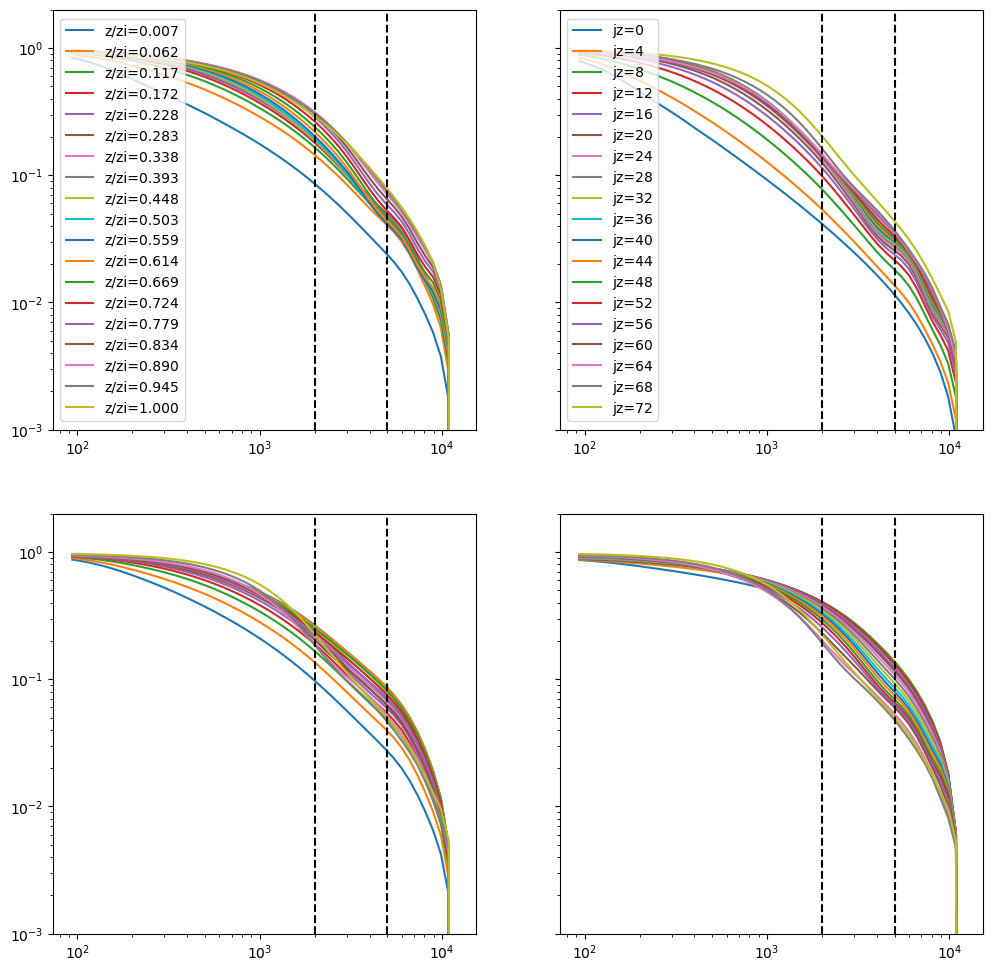

In [25]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(12, 12))
for jz in np.arange(0, s.nzabl, 4):
    # u
    ax1[0,0].loglog(RFM_var.delta_x, 
                    RFM_var.u.isel(z=jz)/s.u_var_rot.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # w
    ax1[0,1].loglog(RFM_var.delta_x, 
                    RFM_var.w.isel(z=jz)/s.w_var.isel(z=jz),
                    label=f"jz={jz}")
    # theta
    ax1[1,0].loglog(RFM_var.delta_x, 
                    RFM_var.theta.isel(z=jz)/s.theta_var.isel(z=jz))
    # q
    ax1[1,1].loglog(RFM_var.delta_x, 
                    RFM_var.q.isel(z=jz)/s.q_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])
ax1[0,0].legend(loc="center left")
ax1[0,1].legend(loc="center left")
dx_fit_1 = [2000, 5000]
for iax in ax1.flatten():
    iax.axvline(dx_fit_1[0], c="k", ls="--")
    iax.axvline(dx_fit_1[1], c="k", ls="--")

## Plot uw, tw, qw, uu, ww, tt

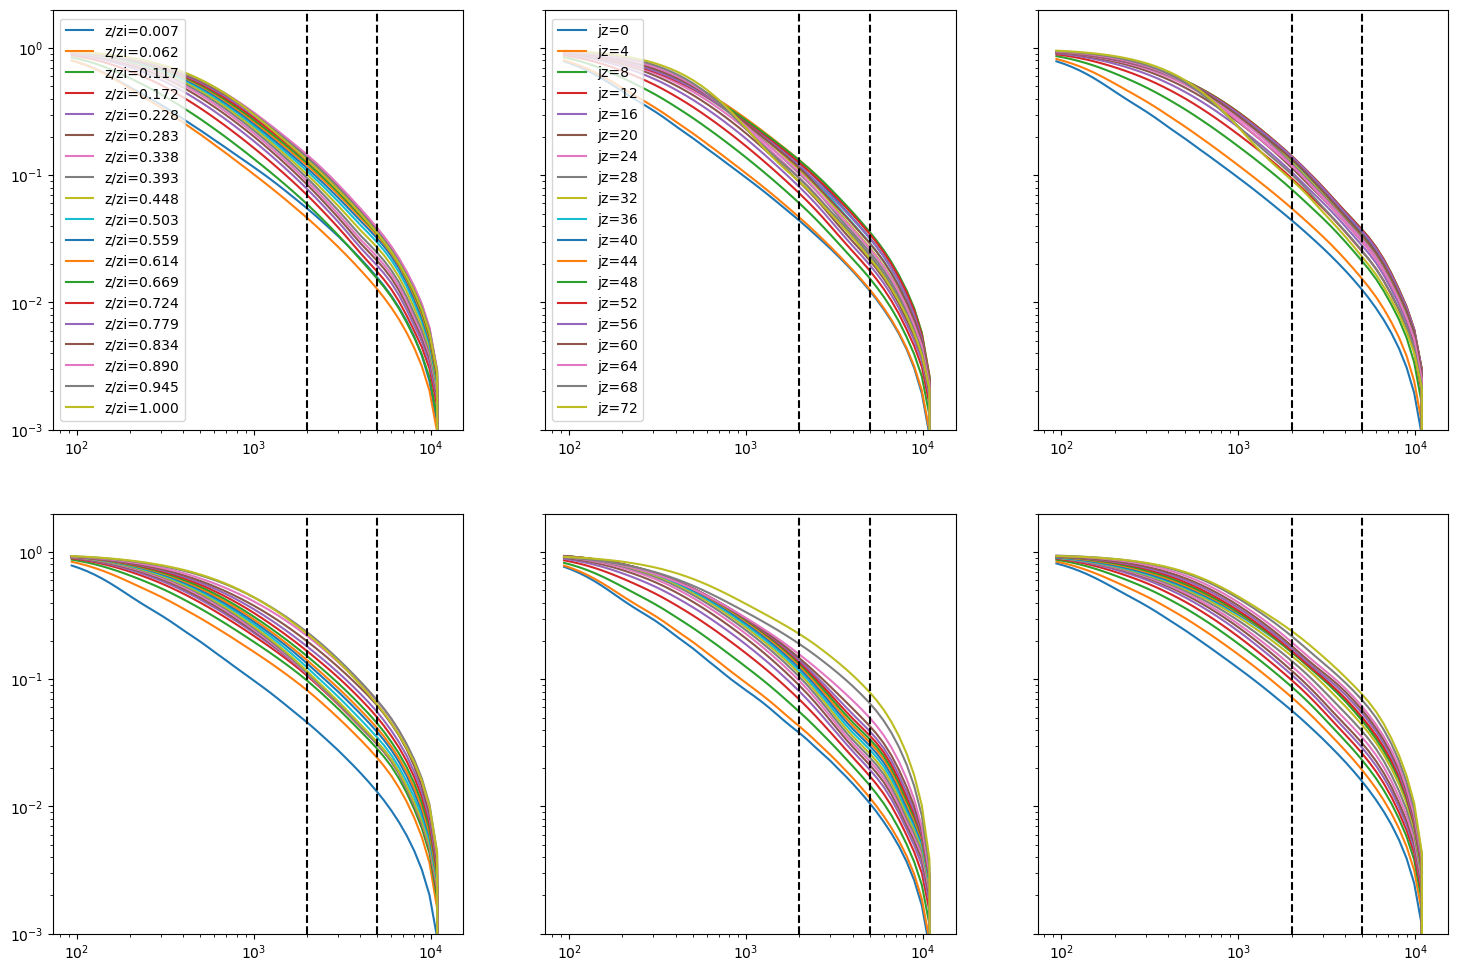

In [28]:
fig1, ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(18, 12))
for jz in np.arange(0, s.nzabl, 4):
    # uw
    ax1[0,0].loglog(RFM_var.delta_x, 
                    RFM_var.uw.isel(z=jz)/var4.uwuw_var.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # tw
    ax1[0,1].loglog(RFM_var.delta_x, 
                    RFM_var.tw.isel(z=jz)/var4.twtw_var.isel(z=jz),
                    label=f"jz={jz}")
    # qw
    ax1[0,2].loglog(RFM_var.delta_x, 
                    RFM_var.qw.isel(z=jz)/var4.qwqw_var.isel(z=jz))
    # uu
    ax1[1,0].loglog(RFM_var.delta_x, 
                    RFM_var.uu.isel(z=jz)/var4.uuuu_var.isel(z=jz))
    # ww
    ax1[1,1].loglog(RFM_var.delta_x, 
                    RFM_var.ww.isel(z=jz)/var4.wwww_var.isel(z=jz))
    # tt
    ax1[1,2].loglog(RFM_var.delta_x, 
                    RFM_var.tt.isel(z=jz)/var4.tttt_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])
ax1[0,0].legend(loc="center left")
ax1[0,1].legend(loc="center left")
dx_fit_2 = [2000, 5000]
for iax in ax1.flatten():
    iax.axvline(dx_fit_2[0], c="k", ls="--")
    iax.axvline(dx_fit_2[1], c="k", ls="--")